# Exploration of Trust dataset

### Summary of dataset 
Information gathered from attitudinal trust surveys       
The "share of people who trust" is the sum of those who responded "a lot", and "some".    
df_trust_gov = 'share of people who trust their national government in 2020' .   
df_trust_science = 'share of people who trust science in 2020' .   
df_trust_journalists = 'share of people who trust journalists in 2020' .     

In [148]:
#Importation of all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
import math
import json
import ssl
from scipy import stats

#To dowload data
import requests
import io

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

In [149]:
# Load datasets from https://ourworldindata.org/trust
data_folder = 'data/'

df_trust_gov = pd.read_csv(data_folder+'share-who-trust-government.csv') 
df_trust_science = pd.read_csv(data_folder+'share-people-trust-science.csv')
df_trust_journalists = pd.read_csv(data_folder+'share-people-trust-journalists-country.csv')


### 1. Visualizing Government trust

In [150]:
df_trust_gov

,Entity,Code,Year,Trust the national government in this country
0,Albania,ALB,2020,41.4
1,Algeria,DZA,2020,47.8
2,Argentina,ARG,2020,43.9
3,Australia,AUS,2020,69.5
4,Austria,AUT,2020,73.4
...,...,...,...,...
102,Uruguay,URY,2020,70.2
103,Uzbekistan,UZB,2020,94.5
104,Venezuela,VEN,2020,30.9
105,Zambia,ZMB,2020,47.1


In [151]:
# World map of Trust in the national government in all countries 
# Create world map on trust 
fig = go.Figure(data=go.Choropleth(
    locations = df_trust_gov['Code'],
    z = df_trust_gov['Trust the national government in this country'],
    text = df_trust_gov['Entity'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Share of people who trust their government in 2020',
   
))

fig.show()

Now we look into the 11 countries that we have analysed with the Coronawiki and Covid-19 dataset

In [152]:
our_countries = ["France", "Denmark", "Germany", "Italy", "Netherlands", "Norway", "Serbia", "Sweden", "South Korea", "Finland", "Japan"]
# Select 11 countries from dataframe
df_trust_gov =  df_trust_gov[df_trust_gov['Entity'].isin(our_countries)]

# Sort values for bargraph
df_trust_gov = df_trust_gov.sort_values(by=['Trust the national government in this country'])
df_trust_gov

,Entity,Code,Year,Trust the national government in this country
48,Japan,JPN,2020,49.5
47,Italy,ITA,2020,52.3
88,South Korea,KOR,2020,52.8
32,France,FRA,2020,56.3
84,Serbia,SRB,2020,57.0
91,Sweden,SWE,2020,64.7
70,Netherlands,NLD,2020,78.5
24,Denmark,DNK,2020,79.3
31,Finland,FIN,2020,80.7
35,Germany,DEU,2020,82.0


In [153]:
# The colors for barcharts
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"
SALMON = '#FF796C'
CRIMSON = '#8C000F'
AZURE ='#069AF3'
ORCHID = '#C875C4'

In [154]:
def bar_plot(title, subtitle,df_country, df_trust, color):
    fig, ax = plt.subplots(figsize=(12, 7))
    fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)
    # Add title
    fig.text(0, 0.925, title, fontsize=20, fontweight="bold", fontfamily="Econ Sans Cnd")
    # Add subtitle
    fig.text(0, 0.875, subtitle, fontsize=15, fontfamily="Econ Sans Cnd")

    ax.barh(df_country, df_trust, height=0.55, align="edge", color=color);
    ax.xaxis.set_ticks([i * 20 for i in range(0, 5)])
    ax.xaxis.set_ticklabels([i * 20 for i in range(0, 5)], size=13, fontfamily="Econ Sans Cnd", fontweight=100)

    ax.set_xlim((0, 100))
    ax.set_ylim((0, len(df_country)))

    ax.set_axisbelow(True)
    ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_lw(1.5)
    ax.spines["left"].set_capstyle("butt")

    PAD = 0.3
    k= 0
    for country, trust in zip(df_country,df_trust):
        x = 0
        color = "white"
        path_effects = None
        ax.text(x + PAD, k + 0.5 / 2, country, 
            color=color, fontfamily="Econ Sans Cnd", fontsize=18, va="center",
        path_effects=path_effects) 
        ax.text(trust + PAD, k + 0.5 / 2, str(trust)+'%', 
            color=BLACK, fontfamily="Econ Sans Cnd", fontsize=13, va="center",
            path_effects=path_effects
        ) 
        k = k+1



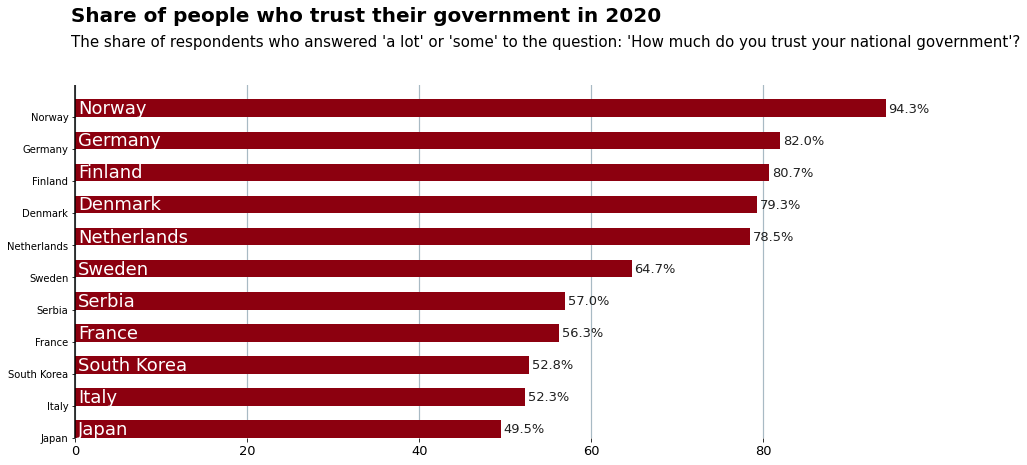

In [155]:
bar_plot("Share of people who trust their government in 2020", "The share of respondents who answered 'a lot' or 'some' to the question: 'How much do you trust your national government'?"
,df_trust_gov['Entity'],df_trust_gov['Trust the national government in this country'], CRIMSON)

### 1. Visualizing Trust in Journalists

In [156]:
df_trust_journalists

,Entity,Code,Year,Trust journalists in this country
0,Albania,ALB,2020,53.8
1,Algeria,DZA,2020,47.1
2,Argentina,ARG,2020,50.0
3,Australia,AUS,2020,67.6
4,Austria,AUT,2020,73.4
...,...,...,...,...
107,Uzbekistan,UZB,2020,81.3
108,Venezuela,VEN,2020,49.2
109,Vietnam,VNM,2020,47.6
110,Zambia,ZMB,2020,56.4


In [157]:
# World map of Trust in the Journalists in all countries 
fig = go.Figure(data=go.Choropleth(
    locations = df_trust_journalists['Code'],
    z = df_trust_journalists['Trust journalists in this country'],
    text = df_trust_journalists['Entity'],
    colorscale = 'Sunsetdark',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Share of people who trust journalists in this country in 2020',
   
))

fig.show()

Now let's plot the barchart for all countries used in our analysis

In [158]:
# Select 11 countries from dataframe
df_trust_journalists =  df_trust_journalists[df_trust_journalists['Entity'].isin(our_countries)]

# Sort values for bargraph
df_trust_journalists = df_trust_journalists.sort_values(by=['Trust journalists in this country'])
df_trust_journalists

,Entity,Code,Year,Trust journalists in this country
90,South Korea,KOR,2020,27.4
86,Serbia,SRB,2020,30.1
50,Japan,JPN,2020,46.1
49,Italy,ITA,2020,47.4
34,France,FRA,2020,61.5
26,Denmark,DNK,2020,68.4
93,Sweden,SWE,2020,70.6
72,Netherlands,NLD,2020,75.7
37,Germany,DEU,2020,78.6
33,Finland,FIN,2020,80.4


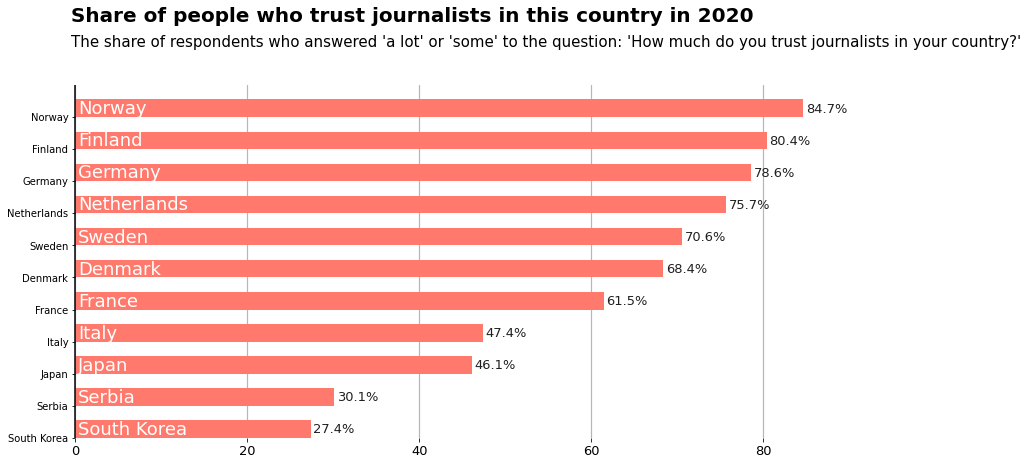

In [159]:
bar_plot( 'Share of people who trust journalists in this country in 2020', "The share of respondents who answered 'a lot' or 'some' to the question: 'How much do you trust journalists in your country?'"
,df_trust_journalists['Entity'],df_trust_journalists['Trust journalists in this country'], SALMON)

### 1. Visualizing Trust in Science

In [160]:
df_trust_science

,Entity,Code,Year,Trust science
0,Albania,ALB,2020,64.7
1,Algeria,DZA,2020,84.4
2,Argentina,ARG,2020,81.4
3,Australia,AUS,2020,85.8
4,Austria,AUT,2020,89.5
...,...,...,...,...
108,Uzbekistan,UZB,2020,96.0
109,Venezuela,VEN,2020,73.3
110,Vietnam,VNM,2020,81.3
111,Zambia,ZMB,2020,64.7


Let's first look at a world map of percentage of people who trust in science in 2020 per country

In [161]:
# World map of Trust in the national government in all countries 
# Create world map on trust 
fig = go.Figure(data=go.Choropleth(
    locations = df_trust_science['Code'],
    z = df_trust_science['Trust science'],
    text = df_trust_science['Entity'],
    colorscale = 'Blackbody',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Share of people who trust Science in 2020',
   
))

fig.show()

Now, lets analyse the data specifically for the 11 countries again with a barchart

In [162]:
# Select 11 countries from dataframe
df_trust_science =  df_trust_science[df_trust_science['Entity'].isin(our_countries)]

# Sort values for bargraph
df_trust_science= df_trust_science.sort_values(by=['Trust science'])
df_trust_science

,Entity,Code,Year,Trust science
87,Serbia,SRB,2020,79.2
50,Japan,JPN,2020,86.2
77,Norway,NOR,2020,89.9
72,Netherlands,NLD,2020,90.3
91,South Korea,KOR,2020,90.4
26,Denmark,DNK,2020,91.1
49,Italy,ITA,2020,93.4
33,Finland,FIN,2020,94.1
34,France,FRA,2020,94.1
37,Germany,DEU,2020,96.7


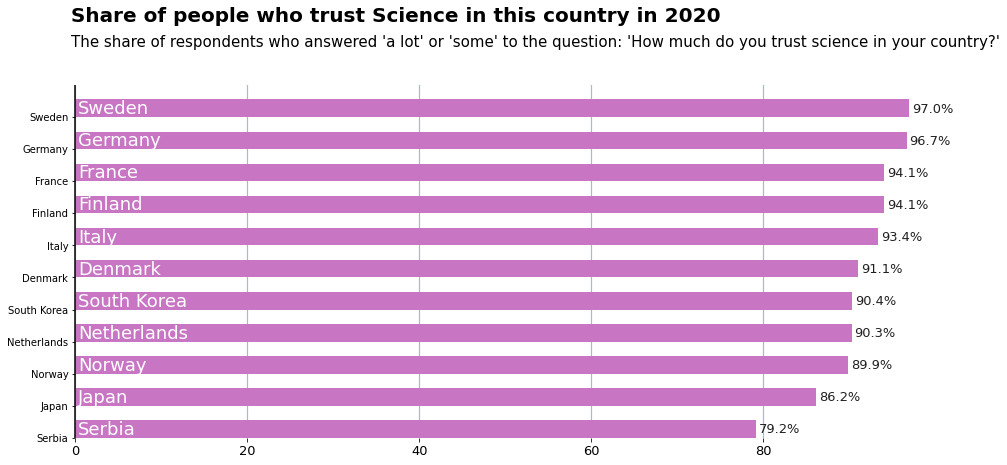

In [163]:
bar_plot( 'Share of people who trust Science in this country in 2020', "The share of respondents who answered 'a lot' or 'some' to the question: 'How much do you trust science in your country?'"
,df_trust_science['Entity'],df_trust_science['Trust science'], ORCHID)

## Analysis 

From this dataset we can get an insight into the feeling of people towards their government, journalists and beliefs in science. This can be interesting to look at with relation to covid related pageviews, and brings up many interesting questions. Do countries where there is a lot of trust in Science research a lot about covid-19 on wikipedia? Do countries where there is a lot of trust in the government follow their moblity restricitons better than countries where there is not lot of trust? Is their mobiltiy restrction harsher? In countries where journalists are not trusted, do people tend to visit wikipedia pages as a source of information? While there are many intersting questions to uncover, milestone 3 will only focus on a couple of these questions.